## Seaborn charting examples

### Load in wholesale data

In [1]:
import pandas as pd
import datetime as dt
import glob
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
#Read in NZ wholesale electricity prices from 2012 to 2021
prices = pd.read_csv('Wholesale_price_trends_20220822204109.csv', \
  header=8)
prices.head(2)

,Period start,Period end,Region ID,Region,Price ($/MWh)
0,01/01/2012,02/01/2012,SFD2201,SFD2201 - Stratford,45.24
1,01/01/2012,02/01/2012,HAY2201,HAY2201 - Haywards,45.06


In [3]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168978 entries, 0 to 168977
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Period start   168978 non-null  object 
 1   Period end     168978 non-null  object 
 2   Region ID      168978 non-null  object 
 3   Region         168978 non-null  object 
 4   Price ($/MWh)  168978 non-null  float64
dtypes: float64(1), object(4)
memory usage: 6.4+ MB


In [4]:
print(prices['Region ID'].unique())
print('Number of Region IDs: ' + str(prices['Region ID'].unique().size))

['SFD2201' 'HAY2201' 'BPE0331' 'BPE0551' 'BPE2201' 'BRK0331' 'CPK0111'
 'CPK0331' 'CST0331' 'DVK0111' 'GFD0331' 'GYT0331' 'HAY0111' 'HAY0331'
 'HAY1101' 'HUI0331' 'HWA0331' 'HWA0332' 'HWA1101' 'HWA1102' 'KPA1101'
 'KWA0111' 'LTN0331' 'MGM0331' 'MHO0331' 'MLG0111' 'MLG0331' 'MNI0111'
 'MST0331' 'MTN0331' 'MTR0331' 'NPL0331' 'NPL1101' 'NPL2201' 'OPK0331'
 'PNI0331' 'PRM0331' 'SFD0331' 'TKR0331' 'TWC2201' 'UHT0331' 'WDV0111'
 'WDV1101' 'WGN0331' 'WIL0331' 'WPW0331' 'WVY0111' 'WWD1102' 'WWD1103'
 'MKE1101' 'JRD1101' 'WVY1101' 'LTN2201']
Number of Region IDs: 53


In [5]:
path = './generation_data'
all_files = glob.glob(os.path.join(path, "*.csv"))
df_from_each_file = (pd.read_csv(f, header=8) for f in all_files)
generation = pd.concat(df_from_each_file, ignore_index=True)

generation.head(2)

,Period start,Period end,Region ID,Region,Generation (GWh),Generation ($)
0,01/01/2012,02/01/2012,OTA2202,OTA2202 - Otahuhu,0.000,0.00
1,01/01/2012,02/01/2012,HLY2201,HLY2201 - Huntly,6.955,352716.33


In [6]:
def data_clean(wholesale_df):
  #Convert columns to useful pandas datatypes
  wholesale_df['Period start'] = pd.to_datetime(wholesale_df['Period start'],dayfirst=True )
  wholesale_df['Period end'] = pd.to_datetime(wholesale_df['Period end'],dayfirst=True )
  wholesale_df = wholesale_df.astype({ \
    'Region ID': 'category', \
    'Region': 'category'})
  wholesale_df['day'] = wholesale_df['Period start'].dt.day  
  wholesale_df['week'] = wholesale_df['Period start'].dt.isocalendar().week
  wholesale_df['month'] = wholesale_df['Period start'].dt.month
  wholesale_df['year'] = wholesale_df['Period start'].dt.year  

  return wholesale_df

In [7]:
prices = data_clean(prices)
prices.info()

prices.loc[(prices['Region ID']=='HAY2201') & (prices.month==10) & (prices.day==1)]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168978 entries, 0 to 168977
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Period start   168978 non-null  datetime64[ns]
 1   Period end     168978 non-null  datetime64[ns]
 2   Region ID      168978 non-null  category      
 3   Region         168978 non-null  category      
 4   Price ($/MWh)  168978 non-null  float64       
 5   day            168978 non-null  int64         
 6   week           168978 non-null  UInt32        
 7   month          168978 non-null  int64         
 8   year           168978 non-null  int64         
dtypes: UInt32(1), category(2), datetime64[ns](2), float64(1), int64(3)
memory usage: 8.9 MB


,Period start,Period end,Region ID,Region,Price ($/MWh),day,week,month,year
13489,2012-10-01,2012-10-02,HAY2201,HAY2201 - Haywards,37.96,1,40,10,2012
146383,2020-10-01,2020-10-02,HAY2201,HAY2201 - Haywards,190.69,1,40,10,2020
164379,2021-10-01,2021-10-02,HAY2201,HAY2201 - Haywards,94.63,1,39,10,2021


In [8]:
generation = data_clean(generation)
generation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753340 entries, 0 to 753339
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Period start      753340 non-null  datetime64[ns]
 1   Period end        753340 non-null  datetime64[ns]
 2   Region ID         753340 non-null  category      
 3   Region            753340 non-null  category      
 4   Generation (GWh)  753340 non-null  float64       
 5   Generation ($)    753340 non-null  float64       
 6   day               753340 non-null  int64         
 7   week              753340 non-null  UInt32        
 8   month             753340 non-null  int64         
 9   year              753340 non-null  int64         
dtypes: UInt32(1), category(2), datetime64[ns](2), float64(2), int64(3)
memory usage: 46.7 MB


## Chart wholesale data

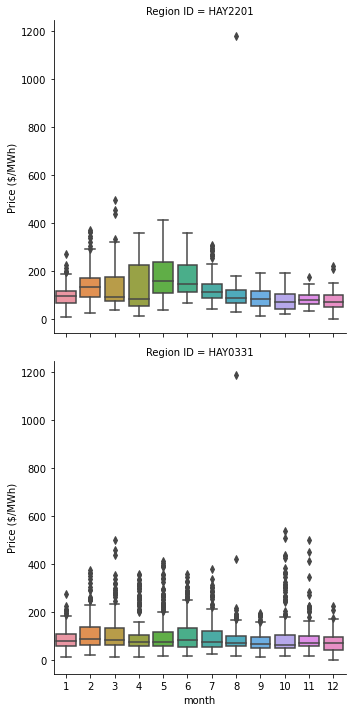

In [18]:
Regions = ['HAY2201', 'HAY0331']

prices['Region ID'].isin(Regions)
data = prices.loc[prices['Region ID'].isin(Regions), :]
# Need to change Region ID back to a sting to prevnt all categories 
# being charted
data = data.astype({'Region ID': 'string'})

sns.catplot(x = 'month', y = 'Price ($/MWh)', \
  kind = 'box', data = data, row ='Region ID')

plt.show()

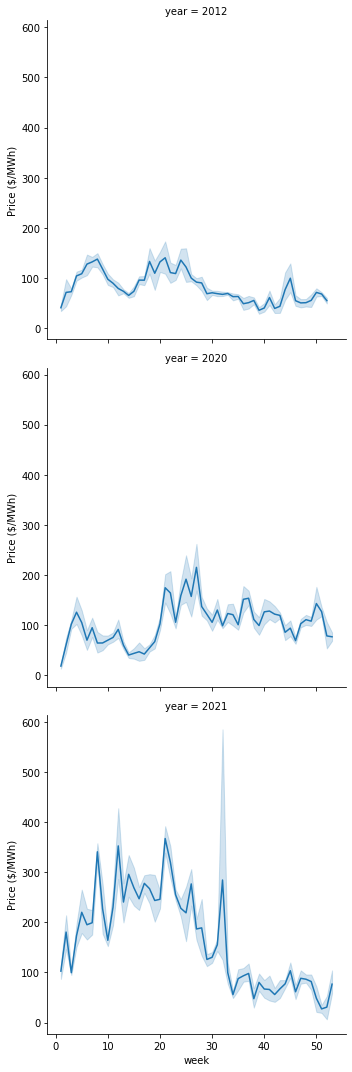

In [23]:
sns.relplot(x = 'week', y = 'Price ($/MWh)', \
  kind = 'line', data = prices[prices['Region ID'] == 'HAY2201'], row = 'year')

plt.show()